In [1]:
import pandas as pd
from functions.interact import *
from data import *

## Contents:
1. Introduction
2. Hypothesis Testing to Compare AQI in Los Angeles and the rest of California
3. Exploring Racial Disparities in Environmental Factors in Los Angeles County
    - Pollution vs Health Outcome
    - Comparisons between Age Groups and Environmental Factors [MAP]
    - Comparisons between Age Groups and Environmental Factors [PLOT]
4. Discussion
5. Conclusion

# Environmental Justice 

## Introduction

Environmental justice is a critical in Sociology because it highlights the intersection of social inequality, environmental policy, and public health. It is also about ensuring that all communities—regardless of race, income, or location—have access to a clean and healthy environment. However, research and policy discussions have shown that pollution exposure and environmental hazards are not evenly distributed in some areas. Particularly in [LA County](http://www.publichealth.lacounty.gov/eh/about/environmental-justice.htm), low-income neighborhoods and communities of color are often disproportionately affected by industrial pollution, poor air quality, and hazardous waste, leading to significant health disparities.

This notebook utilizes a data-driven approach in analyzing environmental justice issues in Los Angeles County. Using statistical analysis, visualization, and geospatial data, we will explore how environmental hazards and health burdens vary across different racial groups. This analysis is essential for identifying systemic inequalities in exposure to environmental hazards and can help guide effective policy interventions.

First, we will explore a case study derived from [Kaggle](https://www.kaggle.com/code/yakhyojon/air-quality-statistical-and-hypothesis-testing/notebook) which observes the average AQI variation across different states where Ripple Renewable Energy operates. The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. To learn more about the study, feel free to visit the website linked above. 

In [2]:
aqi_data = pd.read_csv("data/c4_epa_air_quality.csv")  

In [3]:
states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
aqi_states = aqi_data[aqi_data['state_name'].isin(states)]
aqi_states.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}).rename(columns={"aqi":"mean aqi", "state_name": "obvservations"})

,mean aqi,obvservations
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


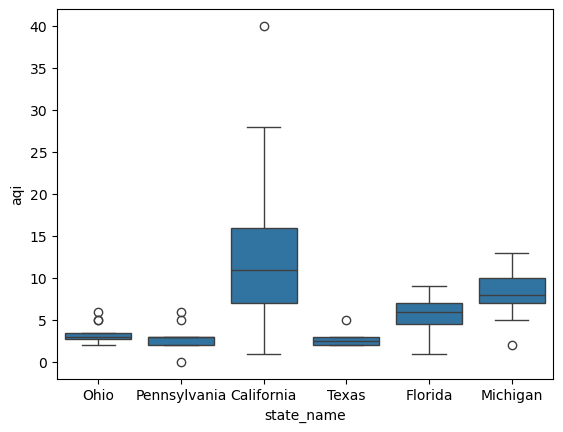

In [4]:
sns.boxplot(x=aqi_states["state_name"],y=aqi_states["aqi"]);

The visualization above clearly displays higher AQI in California compared to the other states. Can you come up with reasons why AQI in California is higher compared to the other States? Do you think demographic factors play into this?

**Replace with your answer.**

## Comparing average AQI in Los Angeles to the rest of California

Now that we know Let's explore air quality in Los Angeles. For now, we want to know if mean AQI in Los Angeles County is statistically different from the rest of California. Below we will be conducting hypothesis testing. Follow along to understand the process of using statistics to make data inference.

In [5]:
ca_la = aqi_data[aqi_data['county_name']=='Los Angeles']
ca_other = aqi_data[(aqi_data['state_name']=='California') & (aqi_data['county_name']!='Los Angeles')]

### STEP 1: Formulating hypothesis

- $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California
- $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California

Significance level ($\alpha$): 5% 

### STEP 2: Determining what type of test to use

Since we are comparing the sample means between two independent samples, we will use a two-sample t-test. For more information on statistical tests, scroll down to the bottom of this [page](https://www.scribbr.com/statistics/statistical-tests/) to find the Choosing a Statistical Test flow chart.

### STEP 3: Computing the p value

In [6]:
stats_result = stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)
print(f"p-value: {stats_result.pvalue}")

p-value: 0.049839056842410995


#### Insight:

- p-value: 0.049 (less than 0.05)
- we reject the null hypothesis in favor of alternative hypothesis

**There is significant statistical evidence that there is a difference in the mean AQI between Los Angeles County and the rest of California.** This makes sense due to Los Angeles being substantially more densely populated than the rest of California. Now let's explore racial factors and whether the distribution is fair across the county. That is, are certain groups more likely to live in areas with higher AQI.



## Exploring the Intersection between Racial Disparities and Environmental/ Health Factors in Los Angeles County

Now that we have significant evidence supporting environmental conditions in LA County, we might want to further analyze how these conditions affect different racial groups. As you run the cells below, aim to use critical thinking skills to assess why certain groups are likely to be exposed to hazardous environmental and health conditions than others. The chicken vs egg question is one common analogy used when discussing proximity of minorities to hazardous sites in urbanized areas. Are minority groups more likely to move in these areas due to lower costs? Or are they systematically placed in areas with higher minority population density?

### Study Area: Los Angeles County

In [10]:
showLAmap()

### DATA

According to the [Office of Environmental Health Hazard Assessment](https://oehha.ca.gov/), CalEnviroscreen 4.0 was designed to help CalEPA identify disadvantaged communities. SB 535 calls for CalEPA to identify disadvantaged communities based on geographic, socioeconomic, public health and environmental hazard criteria. 

**We acquired data from [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/maps-data) for 2021.** Each point in the map corresponds to information on a census tract level. A census tract is a small, relatively permanent geographic area, a subdivision of a county, used by the U.S. Census Bureau to collect and present census data, often roughly corresponding to a neighborhood. Running the cell below will cleanup the data 
and exract the most relevant features for our case study such as:

- Census Tract
- Population
- PM2.5
- Cleanup Sites
- Haz. Waste
- Pollution Burden
- Asthma
- Cardiovascular Disease
- Traffic
- Hispanic (%)
- White (%)
- African American (%)
- Asian American (%)

In [4]:
# PLEASE RUN THIS CELL ONLY ONCE

path= "data/calenviroscreen40resultsdatadictionary_F_2021.xlsx"
enviro_data = clean_enviro_data(path)

**Feel free to uncomment before running the cell below to see the cleaned data.**

In [6]:
# enviro_data

### Pollution vs Health Outcome

After running the cell below, you will be shown a map that visualizes the relationship between pollution burden and health outcomes in Los Angeles County. Without running hypothesis testing, what do you immediately notice about the relationship between Pollution Burden and Health Outcomes? Do you think there is a correlation between Cardiovascular Disease Rate and Asthma Rate? Is our hypothesis that minority groups are more negatively affected by hazardous conditions consistent with the interactive map below? If not, what other factors might we be leaving out?

**Replace with your answer.**

In [11]:
create_pollution_map(enviro_data)  

### Race Groups versus Environmental and Health Factors [MAP]

Below you will interact with a map that displays how different factors vary across different racial groups in Los Angeles County. For example, by selecting a pollution factor (such as PM2.5 or hazardous waste) and two racial groups, you might get see that certain groups are more exposed to certain conditions.

Note: Each circle marker represents a census tract:
- Larger circles indicate a greater disparity between the two groups, while smaller circles suggest more similar population proportions in that area. This allows you to see where racial demographic differences are most pronounced in relation to environmental factors like pollution burden, hazardous waste, or air quality.
- Color intensity reflects pollution levels, helping identify areas with higher environmental burdens. 

Use the dropdowns to compare different factors and groups, gaining insights into racial disparities in pollution exposure.

In [8]:
interactive_pollution_map(enviro_data) 

Dropdown(description='Factor:', index=1, options=('PM2.5', 'Pollution Burden', 'Cleanup Sites', 'Haz. Waste', …

Dropdown(description='Group 1:', options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian American…

Dropdown(description='Group 2:', index=1, options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian…

Button(button_style='primary', description='Update Map', style=ButtonStyle())

Output()

### Race Groups versus Environmental and Health Factors [PLOT]

Below is a scatter plot that compares environmental/health factors and racial demographics in Los Angeles County. Each point represents a census tract, with purple for Group 1 and orange for Group 2. 

In [9]:
interactive_scatter_plot(enviro_data) 

Dropdown(description='Hazard Factor:', options=('Pollution Burden', 'Cleanup Sites', 'Haz. Waste', 'Asthma', '…

Dropdown(description='Group 1:', options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian American…

Dropdown(description='Group 2:', index=1, options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian…

Button(button_style='primary', description='Update Plot', style=ButtonStyle())

Output()

## Discussion

The analyses and interactive maps above reveal clear disparities in pollution exposure and health outcomes among racial groups in Los Angeles County. Minority communities face higher pollution burdens and increased rates of asthma and cardiovascular disease, raising the chicken-or-egg question in environmental justice: Did toxic sites attract marginalized communities due to housing policies, or were they placed there due to weaker resistance? This creates a reinforcing cycle, where chronic pollution exposure worsens health and economic mobility. The findings highlight systemic inequalities but also raise questions: What policies have shaped these patterns, and how can interventions break this cycle?

**Replace with your answer.**

## Conclusion

This notebook highlights environmental inequalities in Los Angeles County, showing how pollution and health risks disproportionately affect marginalized communities. By combining statistical analysis and mapping, we reveal patterns of pollution burden and racial disparities. While data helps quantify these issues, addressing environmental justice requires policy action and community involvement to create lasting change.

Congratulations! You made it to the end.